<a href="https://colab.research.google.com/github/danliba/web_page/blob/main/Clorofila_mar_peruano_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### INTRO

In [7]:
#INTRO
print('Hello World')
#suma y resta
print(1+2)
print(4-1)
#division y multiplicacion
print(24*56)
print(3234/52)
#Potencia
print(34**3)

#guarda valores en una variable
a=56
b=45
#halla a^b
print(a**b)


#crear un array con numpy
import numpy as np

datos=np.array([[2,4,5,6,7],[2,5,6,6,9],[4,2,3,56,78]])

print(datos)

#crea un vector con pandas
import pandas as pd
df=pd.DataFrame(datos)
df


Hello World
3
3
1344
62.19230769230769
39304
4660808027410506132900915088997417305944355117847144307414511042169984019070976
[[ 2  4  5  6  7]
 [ 2  5  6  6  9]
 [ 4  2  3 56 78]]


,0,1,2,3,4
0,2,4,5,6,7
1,2,5,6,6,9
2,4,2,3,56,78


## **Codigo para graficar la clorofila en el mar peruano**

In [25]:
#primero hacemos la descarga de los datos de CMEMS 
#subirlos a la carpeta clorofila
!cd Clorofila
!ls
#con el comando !cd colocamos la ruta, en este caso Clorofila


Clorofila  sample_data


Importa las librerias antes de comenzar el codigo

In [79]:
#importar
import os
from netCDF4 import Dataset
from datetime import date
import numpy as np
#from oceans.colormaps import cm
import matplotlib.pyplot as plt
import pandas as pd
#from mpl_toolkits.basemap import Basemap

In [6]:
#sacamos la ruta dando click derecho copiar ruta sobre el archivo NC que subimos
path0='/content/Clorofila/mayo_2021_pre.nc'
data=Dataset(path0)

In [7]:
#vemos las caracteristicas de nuestro archivo NC
data.variables

{'CHL': <class 'netCDF4._netCDF4.Variable'>
 float32 CHL(time, lat, lon)
     _FillValue: -999.0
     input_files_reprocessings: Processors versions: MODIS 2018.1QLP/VIIRSN 2018.0QL+2018.0QLP/OLCIA 07.01NR/VIIRSJ1 2018.0.1QL/OLCIB 07.01+07.01NR
     long_name: Chlorophyll-a concentration - Mean of the binned pixels
     valid_min: 0.0
     missing_value: -999.0
     valid_max: 1000.0
     standard_name: mass_concentration_of_chlorophyll_a_in_sea_water
     units: milligram m-3
     type: surface
     _ChunkSizes: [  1 256 256]
     coordinates: time lat lon 
 unlimited dimensions: 
 current shape = (26, 721, 600)
 filling on, 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     long_name: latitude
     units: degrees_north
     axis: Y
     standard_name: latitude
     valid_min: -90.0
     valid_max: 90.0
     _ChunkSizes: 4320
     _CoordinateAxisType: Lat
 unlimited dimensions: 
 current shape = (721,)
 filling on, default _FillValue of 9.969209968386869e+36 used, 'lon'

In [8]:
#variables de long, latitud, tiempo
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
time = data.variables['time'][:]


In [9]:
#encontrando el dia 1 o dia de creacion
creation_day = data.variables['time'].units[11:21]
#print('El dia de creacion fue ',creation_day)
yy=int(creation_day[:4]); mm=int(creation_day[5:7]); dd=int(creation_day[8:10])  
print('año de creacion:',yy); print('mes de creacion:',mm); print('dia de creacion:',dd)

año de creacion: 1900
mes de creacion: 1
dia de creacion: 1


In [10]:
#fecha=date.fromordinal(int(time+np.array(date.toordinal(date(yy,mm,dd)))))
fecha=time+np.array(date.toordinal(date(yy,mm,dd)))

In [11]:
#previsualizacion de los datos para el dia 1 del mes seleccionado
clorofila = data.variables['CHL'][:][0,:,:]
clorofila

masked_array(
  data=[[0.14551901817321777, 0.16134792566299438, 0.15250210464000702,
         ..., --, --, --],
        [0.17759840190410614, 0.16052411496639252, 0.15376123785972595,
         ..., --, --, --],
        [0.1804312765598297, 0.15102723240852356, 0.14771388471126556,
         ..., --, --, --],
        ...,
        [0.04858541488647461, 0.049723487347364426, 0.053891103714704514,
         ..., --, --, --],
        [0.048708196729421616, 0.04817037656903267, 0.04965587705373764,
         ..., --, --, --],
        [0.05264205113053322, 0.046409718692302704, 0.04708636924624443,
         ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=-999.0

In [12]:
#libreria de mapas
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759575 sha256=13db39580f622afe01308a0606b89e7ae09fd4d403c844860649dcd3bea33a8f
  Stored in directory: /tmp/pip-ephem-wheel-cache-njw65b5p/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [13]:
!pip install pyproj==1.9.6


In [14]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [18]:
area_centro=[-90,-65, -25, 5]
mp = Basemap(projection ='merc',
             llcrnrlon=int(area_centro[0]),
             llcrnrlat=int(area_centro[2]),
             urcrnrlon=int(area_centro[1]),
             urcrnrlat=int(area_centro[3]),
             resolution='i')

loni,lati = np.meshgrid(lon,lat)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


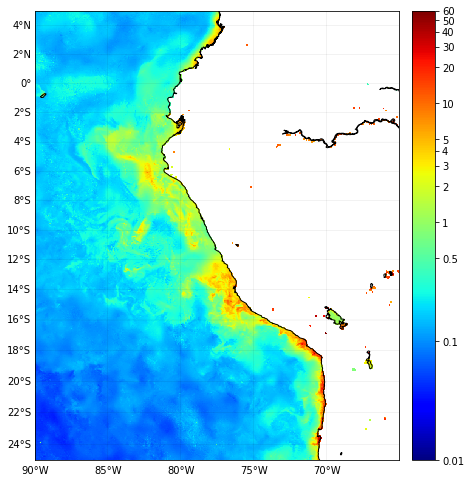

In [46]:
fig=plt.figure(figsize=(11.69,8.27))
x,y = mp(loni,lati)

cs = mp.pcolormesh(x, y, np.log10(clorofila), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')
plt.show()


# Puertos del Peru

In [105]:
##Puertos
import scipy.io
puertos = scipy.io.loadmat('/content/Clorofila/mapa_puertos.mat')

lonp=puertos['lonpuertos']
latp=puertos['latpuertos']
lon_name=puertos['lonpuertos_text']
lat_name=puertos['latpuertos_text']
nombres_puertos=puertos['puertoselect']
sudamerica=puertos['sudamerica']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


{-90.0: ([<matplotlib.lines.Line2D at 0x7f78a4cf3b90>],
  [Text(2779.8718571170293, -42302.16206301914, '90°W')]),
 -85.0: ([<matplotlib.lines.Line2D at 0x7f78a4cf3b50>],
  [Text(558754.2432805229, -42302.16206301914, '85°W')]),
 -80.0: ([<matplotlib.lines.Line2D at 0x7f78a5439310>],
  [Text(1114728.6147039288, -42302.16206301914, '80°W')]),
 -75.0: ([<matplotlib.lines.Line2D at 0x7f78a5453090>],
  [Text(1670702.9861273346, -42302.16206301914, '75°W')]),
 -70.0: ([<matplotlib.lines.Line2D at 0x7f78a54530d0>],
  [Text(2226677.3575507407, -42302.16206301914, '70°W')])}

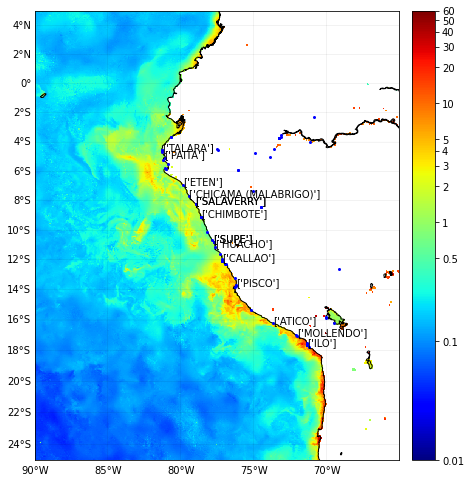

In [104]:
df=pd.DataFrame(nombres_puertos)

fig=plt.figure(figsize=(11.69,8.27))
x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(clorofila), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii],fontsize=10)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')



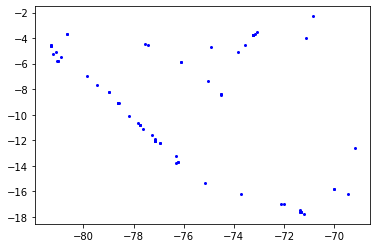

In [62]:
#plt.plot(lonp, latp, 'o', color='blue',markersize=2);


# Calculo de las semanas

In [131]:
import time
import datetime

dt_inicio=datetime.date.fromordinal(int(fecha[0]))
dt_fin=datetime.date.fromordinal(int(fecha[-1]))

print('fecha de inicio: ', dt_inicio)
print('fecha ultima: ', dt_fin)

#se considera una semana como 7 días las 3 primeras semanas y la 4ta hasta donde alcance

fecha de inicio:  2021-05-01
fecha ultima:  2021-05-26


In [140]:
ultimo_dia=int(dt_fin.day)-1
type(ultimo_dia)

int

In [145]:
sem1=np.nanmean(data.variables['CHL'][:][0:6,:,:],axis=0)
sem2=np.nanmean(data.variables['CHL'][:][7:13,:,:],axis=0)
sem3=np.nanmean(data.variables['CHL'][:][14:20,:,:],axis=0)
sem4=np.nanmean(data.variables['CHL'][:][21:ultimo_dia,:,:],axis=0)


{-90.0: ([<matplotlib.lines.Line2D at 0x7f78a3f6b5d0>],
  [Text(2779.8718571170293, -42302.16206301914, '90°W')]),
 -85.0: ([<matplotlib.lines.Line2D at 0x7f78a3f6b550>],
  [Text(558754.2432805229, -42302.16206301914, '85°W')]),
 -80.0: ([<matplotlib.lines.Line2D at 0x7f78a3f6b590>],
  [Text(1114728.6147039288, -42302.16206301914, '80°W')]),
 -75.0: ([<matplotlib.lines.Line2D at 0x7f78a3f40210>],
  [Text(1670702.9861273346, -42302.16206301914, '75°W')]),
 -70.0: ([<matplotlib.lines.Line2D at 0x7f78a3f6ba90>],
  [Text(2226677.3575507407, -42302.16206301914, '70°W')])}

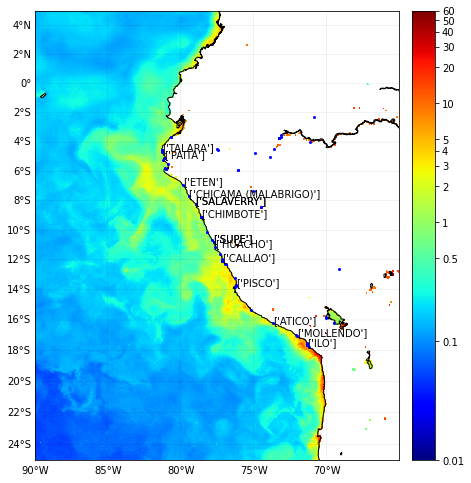

In [151]:
fig=plt.figure(figsize=(11.69,8.27))
x,y = mp(loni,lati)
x2,y2 = mp(lonp,latp)
x3,y3 = mp(lon_name,lat_name)

cs = mp.pcolormesh(x, y, np.log10(sem1), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
for ii in range(0,len(df)):
  plt.text(x3[ii], y3[ii], df[0][ii],fontsize=10)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

In [ ]:
#import scipy.io as sio
#mat=sio.loadmat('file.mat')# load mat-file
#mdata = mat['myVar']  # variable in mat file 
#ndata = {n: mdata[n][0,0] for n in mdata.dtype.names}
#Columns = [n for n, v in ndata.items() if v.size == 1]
#d=dict((c, ndata[c][0]) for c in Columns)
#df=pd.DataFrame.from_dict(d)
#display(df)

#plt.plot(lon,lat,color='black', linestyle='dashed',linewidth=0.1,marker='o',markerfacecolor='green',markersize=5)
#plt.xlabel('Longitud')
#plt.ylabel('Latitud')
#plt.title('2020-01 to 2021-03-27 Floats trajectory in 112ºW-108ºW / 1ºN-1ºS')